# Bootstrap Confidence Intervals

In [0]:
import numpy as np

import pandas as pd

import seaborn as sns

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data generation

### Telecommunication equipment repair time

Verizon is a major regional telecommunications company operating in the United States. The company is obliged to provide telecommunication equipment repair services not only for its customers but also for customers of other local telecommunications companies. Verizon may be fined.

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/OzmundSedler/100-Days-Of-ML-Code/master/week_10/datasets/verizon.txt', sep='\t')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 2 columns):
Time     1687 non-null float64
Group    1687 non-null object
dtypes: float64(1), object(1)
memory usage: 26.4+ KB


In [0]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [0]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

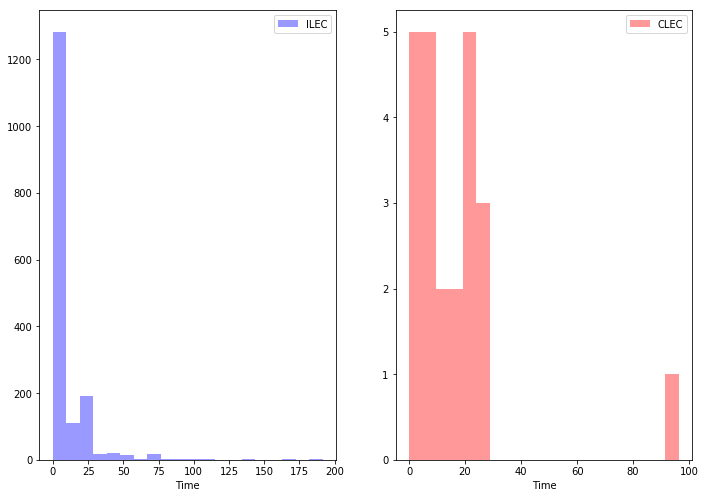

In [0]:
fig, axs = plt.subplots(ncols=2, figsize=(11.7, 8.27))
sns.distplot(data[data.Group == 'ILEC'].Time, bins=20, kde=False, color = 'b', label = 'ILEC', ax=axs[0])
axs[0].legend()
sns.distplot(data[data.Group == 'CLEC'].Time, bins=20, kde=False, color = 'r', label = 'CLEC', ax=axs[1])
axs[1].legend()

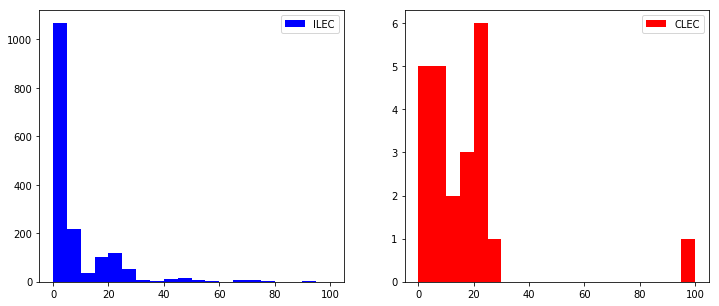

In [0]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data[data.Group == 'ILEC'].Time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data.Group == 'CLEC'].Time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend()

pylab.show()

## Bootstrap

In [0]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [0]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Confidence interval for median

In [0]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [0]:
np.random.seed(0)

ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 1000)))

l_1, r_1 = stat_intervals(ilec_median_scores, 0.05)
l_2, r_2 = stat_intervals(clec_median_scores, 0.05)

print (f'95% confidence interval for the ILEC median repair time: {l_1:.3f} - {r_1:.3f}')
print (f'95% confidence interval for the CLEC median repair time:  {l_2:.3f} - {r_2:.3f}')

95% confidence interval for the ILEC median repair time: 3.180 - 3.825
95% confidence interval for the CLEC median repair time:  5.791 - 20.000


### Difference between medians

In [0]:
print ("Difference between medians:", np.median(clec_time) - np.median(ilec_time))

Difference between medians: 10.74


### Confidence interval for the median differnce

In [0]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores)))
l_3, r_3 = stat_intervals(delta_median_scores, 0.05)

In [0]:
print (f'95% confidence interval for the difference between medians:  {l_3:.3f} - {r_3:.3f}')

95% confidence interval for the difference between medians:  2.050 - 16.630
